<a href="https://colab.research.google.com/github/Adachi-Yoshitaka/zemikadai/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
data_1 = pd.read_csv('/content/drive/My Drive/課題データ_成績/PerformanceData_main.csv')
data_1.head()

,eigo,kokugo,sugaku,rika,shakai
0,20,30,51,63,43
1,16,39,49,56,21
2,6,29,23,57,30
3,87,95,77,100,87
4,44,70,78,67,71


In [ ]:
data=data_1.rename(columns={'eigo': 'A'})
data

,A,kokugo,sugaku,rika,shakai
0,20,30,51,63,43
1,16,39,49,56,21
2,6,29,23,57,30
3,87,95,77,100,87
4,44,70,78,67,71
...,...,...,...,...,...
161,90,82,80,88,78
162,1,0,2,9,8
163,27,45,29,24,26
164,56,73,43,32,31


In [ ]:
data_2 = pd.read_csv('/content/drive/My Drive/課題データ_成績/PerformanceData_sub.csv')
data_2.head()

,ongaku,bijutu,taiiku,gika
0,60,66,37,44
1,70,72,56,63
2,69,76,33,54
3,77,82,78,96
4,72,82,46,63


In [ ]:
data_2.shape

(166, 4)

In [ ]:
seiseki = pd.concat([data_1,data_2],axis=1)

In [ ]:
print("{}".format(seiseki.shape))
print("{}".format(seiseki.columns))
seiseki.head()

(166, 9)
Index(['eigo', 'kokugo', 'sugaku', 'rika', 'shakai', 'ongaku', 'bijutu',
       'taiiku', 'gika'],
      dtype='object')


,eigo,kokugo,sugaku,rika,shakai,ongaku,bijutu,taiiku,gika
0,20,30,51,63,43,60,66,37,44
1,16,39,49,56,21,70,72,56,63
2,6,29,23,57,30,69,76,33,54
3,87,95,77,100,87,77,82,78,96
4,44,70,78,67,71,72,82,46,63


In [ ]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans

In [ ]:
sc = preprocessing.StandardScaler()
sc.fit(seiseki)
X_norm = sc.transform(seiseki)
print(type(X_norm))

<class 'numpy.ndarray'>


In [ ]:
X_norm

array([[-0.64872246, -1.0257849 ,  0.22288369, ...,  0.20670378,
        -0.78274382, -0.14730571],
       [-0.78469207, -0.61237172,  0.14011256, ...,  0.55683468,
        -0.06570228,  0.69896425],
       [-1.12461609, -1.0717197 , -0.93591204, ...,  0.79025528,
        -0.93369993,  0.29809953],
       ...,
       [-0.41077565, -0.33676294, -0.68759867, ..., -0.31849256,
         0.38716605, -0.32546781],
       [ 0.575004  ,  0.94941138, -0.10820081, ...,  0.08999348,
         0.91551245,  0.03085639],
       [ 1.56078365,  0.35225902,  1.79553503, ...,  0.96532072,
         0.87777342, -0.10276519]])

In [ ]:
#cls = KMeans(n_clusters=3)
#result = cls.fit(X_norm)
#plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
#plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
#plt.show()

<function matplotlib.pyplot.show>

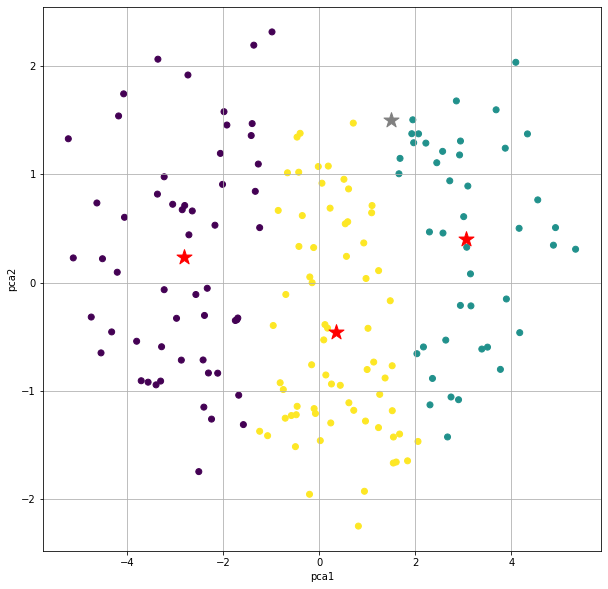

In [ ]:
pca = PCA()
digits_pca=pca.fit_transform(X_norm)
cls = KMeans(n_clusters=3)
result = cls.fit(digits_pca)

plt.figure(figsize=(10,10))

plt.scatter(digits_pca[:,0],digits_pca[:,1],c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.scatter(1.5,1.5,s=250, marker='*',c='gray')
#plt.colorbar()
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.grid()
plt.show

In [ ]:
pd.DataFrame(digits_pca, columns=["PC{}".format(x + 1) for x in range(len(seiseki.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.056586,0.919644,-0.116114,1.192498,0.830682,0.096911,-0.367675,0.272642,-0.091598
1,-0.148353,-0.000471,0.661863,1.181909,1.240720,0.695060,0.440122,-0.210017,-0.060501
2,0.541684,0.544403,0.966211,1.852663,1.095745,-0.048863,-0.342066,-0.501814,0.156577
3,-5.122702,0.228749,0.627713,-0.581843,0.293459,-0.369950,-0.302631,0.243271,0.314434
4,-2.644521,0.663026,0.012151,0.882439,0.046806,-0.466083,0.195953,0.288142,-0.634277
